Download the dataset from IEE Dataport here: https://ieee-dataport.org/open-access/experimental-database-detecting-and-diagnosing-rotor-broken-bar-three-phase-induction#

Extract the zip file and the contents (.mat files) in the same directory as this notebook.

In [1]:
from typing import Any

import mat73
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import ndarray
from pandas import DataFrame
from scipy import signal
from scipy.signal import butter, lfilter

In [2]:
motor_data_files: dict[str, int] = { # file name to number of broken bars
    "rs": 0,
    "r1b": 1,
    "r2b": 2,
    "r3b": 3,
    "r4b": 4
}

In [4]:
all_experiments: list[dict[str, int | str | ndarray]] = []

for struct_name, health_status in motor_data_files.items():
    # use mat73 to load the .mat file since scipy doesn't support mat 7.3 format
    dataset: dict[str, list[dict[str, ndarray]]] = mat73.loadmat("struct_" + struct_name + "_R1.mat")[struct_name]

    # process each torque level in the data
    for load_level in dataset.keys():
        experiments: list[dict[str, ndarray]] = dataset[load_level]
        data: dict = {}

        # Iterate over the given number of experiments for each load level
        for exp in experiments:
            for signal_name in exp.keys():
                data[signal_name] = exp[signal_name].flatten()

            data["Load_Torque"] = int(load_level.replace("torque", ""))
            data["Health"] = health_status

            all_experiments.append(data)
            data = {}

DataFrame(all_experiments)

,Ia,Ib,Ic,Trigger,Va,Vb,Vc,Vib_acpe,Vib_acpi,Vib_axial,Vib_base,Vib_carc,Load_Torque,Health
0,"[0.01666667, 0.008333333, 0.0, -0.008333333, 0...","[-0.004166667, 0.0, 0.0, 0.004166667, -0.00833...","[0.0125, 0.0125, 0.008333333, 0.0, 0.004166667...","[6.219788, 6.219482, 6.219177, 6.219788, 6.219...","[3.341667, 3.35, 3.3, 3.4, 3.275, 3.408333, 3....","[3.341667, 3.35, 3.316667, 3.358333, 3.25, 3.4...","[3.333333, 3.358333, 3.266667, 3.4, 3.258333, ...","[-0.0213623, -0.0213623, -0.0213623, -0.030517...","[-0.07019043, -0.04577637, -0.0213623, 0.0, 0....","[0.01831055, 0.01525879, 0.01220703, 0.0122070...","[0.2624512, 0.1922607, 0.1098633, 0.01220703, ...","[-0.003051758, 0.01525879, 0.02746582, 0.03967...",5,0
1,"[0.008333333, 0.0, 0.0, 0.0, 0.008333333, 0.0,...","[0.0, 0.004166667, 0.0, 0.0, 0.004166667, 0.01...","[0.004166667, -0.004166667, 0.004166667, 0.004...","[6.198425, 6.199646, 6.200562, 6.201782, 6.202...","[-2.933333, -2.95, -2.958333, -2.958333, -2.97...","[-2.95, -2.933333, -2.966667, -2.975, -2.975, ...","[-2.966667, -2.95, -2.95, -2.95, -2.958333, -2...","[0.2349854, 0.2044678, 0.189209, 0.1678467, 0....","[0.03356934, 0.0213623, 0.01831055, 0.00610351...","[0.0, -0.03356934, -0.0213623, 0.0, 0.00610351...","[-0.0793457, -0.1922607, -0.2716064, -0.308227...","[0.1434326, 0.1312256, 0.1098633, 0.0793457, 0...",5,0
2,"[0.008333333, 0.008333333, 0.008333333, 0.0083...","[0.008333333, 0.004166667, 0.01666667, 0.0, 0....","[-0.004166667, 0.004166667, -0.004166667, 0.00...","[6.210938, 6.210327, 6.208191, 6.207581, 6.207...","[2.808333, 2.733333, 2.783333, 2.8, 2.783333, ...","[2.791667, 2.733333, 2.783333, 2.791667, 2.791...","[2.783333, 2.725, 2.783333, 2.766667, 2.8, 2.8...","[0.4180908, 0.4058838, 0.3997803, 0.3997803, 0...","[-0.01525879, -0.0213623, -0.003051758, 0.0030...","[0.03662109, 0.03356934, 0.01525879, 0.0122070...","[0.7598877, 0.8331299, 0.894165, 0.9338379, 0....","[-0.4364014, -0.4364014, -0.4364014, -0.427246...",5,0
3,"[-0.004166667, 0.008333333, 0.008333333, 0.008...","[0.0, -0.004166667, 0.008333333, 0.004166667, ...","[0.0, 0.008333333, 0.0, 0.004166667, 0.0, 0.00...","[6.211853, 6.211853, 6.211243, 6.211243, 6.211...","[2.958333, 2.958333, 2.941667, 2.941667, 2.941...","[2.933333, 2.966667, 2.95, 2.933333, 2.966667,...","[2.933333, 2.933333, 2.95, 2.975, 2.966667, 2....","[-0.189209, -0.1739502, -0.1617432, -0.1586914...","[0.07019043, 0.06408691, 0.05493164, 0.0335693...","[0.003051758, 0.0, -0.003051758, 0.0, -0.00610...","[-0.4302979, -0.3631592, -0.2716064, -0.161743...","[0.2960205, 0.2807617, 0.2563477, 0.2288818, 0...",5,0
4,"[0.008333333, 0.008333333, 0.008333333, -0.008...","[0.004166667, 0.0, 0.0, 0.004166667, 0.0083333...","[0.004166667, 0.0125, 0.008333333, -0.00416666...","[6.182556, 6.18103, 6.181335, 6.181946, 6.1831...","[-2.025, -2.116667, -2.15, -2.175, -2.291667, ...","[-2.0, -2.125, -2.125, -2.191667, -2.275, -2.3...","[-2.0, -2.075, -2.141667, -2.175, -2.308333, -...","[0.01220703, -0.003051758, -0.0213623, -0.0305...","[0.27771, 0.2655029, 0.2471924, 0.2471924, 0.2...","[-0.009155273, -0.01831055, -0.02746582, -0.01...","[-0.03356934, 0.08850098, 0.2105713, 0.3326416...","[0.5950928, 0.5889893, 0.5584717, 0.5645752, 0...",5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,"[0.004166667, 0.0, -0.004166667, 0.0, 0.0, 0.0...","[-0.008333333, 0.004166667, 0.004166667, 0.0, ...","[0.008333333, 0.004166667, 0.01666667, 0.00416...","[6.177368, 6.177368, 6.175537, 6.174927, 6.174...","[1.95, 1.966667, 1.941667, 1.908333, 1.916667,...","[1.958333, 1.958333, 1.941667, 1.941667, 1.908...","[1.958333, 1.958333, 1.95, 1.925, 1.908333, 1....","[0.3570557, 0.3479004, 0.3204346, 0.3204346, 0...","[-0.08850098, -0.08850098, -0.08850098, -0.100...","[0.05187988, 0.04882813, 0.03662109, 0.0396728...","[0.100708, 0.06103516, 0.03356934, 0.03356934,...","[-0.08850098, -0.08239746, -0.06713867, -0.045...",40,4
396,"[-0.004166667, 0.004166667, -0.008333333, -0.0...","[0.00833

In [5]:
# Sampling frequencies
Fs_vib = 7600  # Vibration signals in Hz
Fs_elec = 50000  # Electrical signals in Hz


def butter_bandpass_filter(data: ndarray, lowcut: int, highcut: int, fs: int, order: int = 5):
    # noinspection PyTupleAssignmentBalance
    b, a = butter(N=order, Wn=[lowcut, highcut], fs=fs, btype='band')
    y = lfilter(b, a, data)
    return y


def get_signal(sig_data: ndarray, fs: int) -> ndarray:
    """
    Extract a 1.0 second portion of the signal after 10 seconds of measurements.

    Args:
        fs: Sampling frequency in Hz
    """
    n = len(sig_data)
    t = np.arange(n) / fs
    # Find indices for data between 10.0 and 11.0 seconds
    idx = np.where((t >= 10.0) & (t <= 11.0))[0]
    return sig_data[idx]


def read_variables(experiment_data: dict[str, int | str | ndarray]) -> dict[str, Any]:
    data_dict: dict[str, Any] = {}
    variables = ["Ia", "Vib_acpi", "Health", "Load_Torque",
                 # synthetic features:
                 "Vib_acpi_env", "Ia_env_ps"]

    for var in variables:
        if var in ['Va', 'Vb', 'Vc', 'Ia', 'Ib', 'Ic']:
            # Electrical signals
            val: ndarray = get_signal(experiment_data[var], Fs_elec)
        elif var in ['Vib_acpi', 'Vib_carc', 'Vib_acpe', 'Vib_axial', 'Vib_base', 'Trigger']:
            # Vibration signals
            val: ndarray = get_signal(experiment_data[var], Fs_vib)
        elif var == 'Vib_acpi_env':
            # Synthetic envelope signals for vibration data
            TT: ndarray = get_signal(experiment_data['Vib_acpi'], Fs_vib)

            # Envelope of band-pass filtered signal
            y = butter_bandpass_filter(TT, 900, 1300, Fs_vib)

            val: ndarray = np.abs(signal.hilbert(y))
        elif var == 'Ia_env_ps':
            # Synthetic envelope spectra for electrical data
            TT: ndarray = get_signal(experiment_data["Ia"], Fs_elec)

            # Envelope spectrum of band-pass filtered signal
            y = butter_bandpass_filter(TT, 900, 1300, Fs_elec)
            y_envelope: ndarray = np.abs(signal.hilbert(y))

            # Calculate power spectrum
            f, pxx = signal.periodogram(y_envelope, Fs_elec)
            val: ndarray = np.column_stack((f, pxx))
        else:
            # 'Health', 'Load_Torque', other features and signals
            val: int | str | ndarray = experiment_data[var]

        # Store the value in the dictionary
        data_dict[var] = val

    # Create DataFrame from dictionary
    return data_dict

In [6]:
DataFrame([read_variables(all_experiments[0])])

,Ia,Vib_acpi,Health,Load_Torque,Vib_acpi_env,Ia_env_ps
0,"[-0.8916667, -0.8916667, -0.9041667, -0.904166...","[-3.302002, -3.030396, -2.740479, -2.416992, -...",0,5,"[0.03977157318688926, 0.011971605137963998, 0....","[[0.0, 3.550215651523859e-37], [0.999980000399..."


In [7]:
# Lists to store features and labels
features = []
labels = []

# Process every experiment and create features from the array data
for experiment in all_experiments:
    data: dict[str, Any] = read_variables(experiment)

    sample_features = []

    # Extract vibration envelope features
    vib_env: ndarray = data["Vib_acpi_env"]
    # basic statistical features from vibration envelope
    sample_features.extend([
        np.mean(vib_env),
        np.std(vib_env),
        np.max(vib_env),
        np.min(vib_env),
        np.median(vib_env),
        np.percentile(vib_env, 25),
        np.percentile(vib_env, 75),
        np.sqrt(np.mean(np.square(vib_env)))  # RMS
    ])

    # Add frequency domain features
    f, pxx = signal.periodogram(vib_env, 7600)
    # Extract power in specific frequency bands
    for low, high in [(0, 20), (20, 50), (50, 100), (100, 200), (200, 500)]:
        mask = (f >= low) & (f <= high)
        if np.any(mask):
            sample_features.append(np.sum(pxx[mask]))
        else:
            sample_features.append(0.0)  # If no data in band, append 0

    # Extract current envelope spectrum features if available
    ia_env_ps: ndarray = data["Ia_env_ps"]
    freq = ia_env_ps[:, 0]
    power = ia_env_ps[:, 1]

    # Extract power in specific frequency bands
    for low, high in [(0, 20), (20, 50), (50, 100), (100, 150)]:
        mask = (freq >= low) & (freq <= high)
        if np.any(mask):
            sample_features.append(np.sum(power[mask]))
        else:
            sample_features.append(0.0)  # If no data in band, append 0

    # Add load as a feature
    sample_features.append(data["Load_Torque"])

    # Extract label

    features.append(sample_features)
    labels.append(data["Health"])

# Convert to numpy arrays
X = np.array(features)
y = np.array(labels)

X

array([[5.36187282e-02, 2.99642277e-02, 5.03797049e-01, ...,
        4.66984195e-06, 1.22211555e-05, 5.00000000e+00],
       [6.14360405e-02, 4.40175364e-02, 8.38805968e-01, ...,
        1.61243401e-05, 2.01636194e-05, 5.00000000e+00],
       [5.17125083e-02, 3.63113898e-02, 7.24579848e-01, ...,
        6.25919183e-06, 1.29940954e-05, 5.00000000e+00],
       ...,
       [6.79874850e-02, 4.37233261e-02, 5.28084143e-01, ...,
        9.19933601e-06, 1.41664144e-04, 4.00000000e+01],
       [7.04811824e-02, 4.59132584e-02, 6.33364277e-01, ...,
        1.91501352e-05, 1.47189039e-04, 4.00000000e+01],
       [6.95376489e-02, 5.99450261e-02, 1.07433562e+00, ...,
        4.89077971e-06, 8.74092468e-06, 4.00000000e+01]], shape=(400, 18))

C:\Users\RajaRi\AppData\Local\Temp\ipykernel_24396\3662160343.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap: mcolors.Colormap = plt.cm.get_cmap("viridis", len(set(y)))


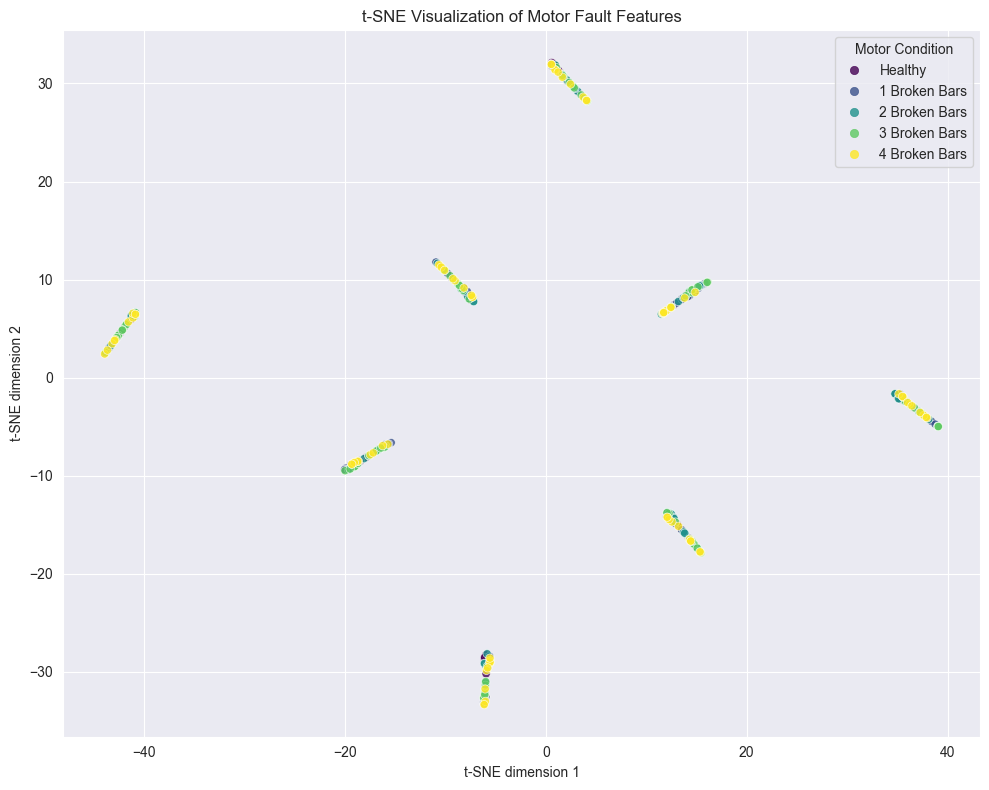

In [9]:
from sklearn.manifold import TSNE
import matplotlib.colors as mcolors

# Create t-SNE model
tsne: TSNE = TSNE(n_components=2, random_state=42, perplexity=30)

# Fit and transform the data
X_tsne: ndarray = tsne.fit_transform(X)

# Create a colormap with distinct colors for each class
cmap: mcolors.Colormap = plt.cm.get_cmap("viridis", len(set(y)))

# Create the plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=cmap, alpha=0.8, edgecolors="w", linewidth=0.5)

# Add legend
legend_labels: list[str] = [f"{i} Broken Bars" if i > 0 else "Healthy" for i in sorted(set(y))]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title="Motor Condition")

# Add labels and title
plt.xlabel("t-SNE dimension 1")
plt.ylabel("t-SNE dimension 2")
plt.title("t-SNE Visualization of Motor Fault Features")
plt.tight_layout()
plt.show()

Best parameters: {'metric': 'manhattan', 'n_neighbors': np.int64(1), 'weights': 'uniform'}
Training accuracy: 1.0000
Test accuracy: 0.7875

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.84      1.00      0.91        16
           2       0.79      0.69      0.73        16
           3       0.58      0.69      0.63        16
           4       1.00      0.75      0.86        16

    accuracy                           0.79        80
   macro avg       0.80      0.79      0.79        80
weighted avg       0.80      0.79      0.79        80



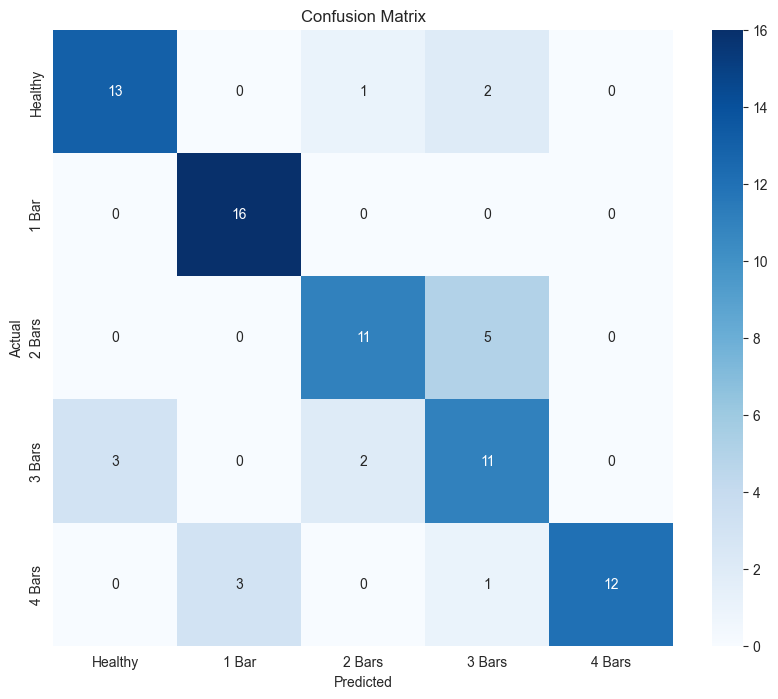

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

# Scale the features
scaler: StandardScaler = StandardScaler()
X_train_scaled: ndarray = scaler.fit_transform(X_train)
X_test_scaled: ndarray = scaler.transform(X_test)

# Find optimal K using grid search with cross-validation
param_grid: dict[str, list[str] | ndarray] = {
    "n_neighbors": np.arange(1, 21),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"]
}

grid_search: GridSearchCV = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

# Get best model
best_knn = grid_search.best_estimator_

# Evaluate on test set
y_pred: ndarray = best_knn.predict(X_test_scaled)
accuracy: float = best_knn.score(X_test_scaled, y_test)

# Print results
print(f"Best parameters: {grid_search.best_params_}")
print(f"Training accuracy: {best_knn.score(X_train_scaled, y_train):.4f}")
print(f"Test accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm: ndarray = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Healthy", "1 Bar", "2 Bars", "3 Bars", "4 Bars"],
            yticklabels=["Healthy", "1 Bar", "2 Bars", "3 Bars", "4 Bars"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Return best parameters and accuracy
best_params = grid_search.best_params_
test_accuracy = accuracy